In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import IPython as ip
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
mpl.style.use('ggplot')
mpl.rc('figure', figsize=(7.2, 5.76))
mpl.rc('font', family='Noto Sans CJK TC')
plt.rc('lines', markeredgecolor='white', markeredgewidth=0.75)
plt.rc('patch', edgecolor='white', force_edgecolor=True, linewidth=1)
ip.display.set_matplotlib_formats('svg')

In [3]:
m = sm.datasets.anes96
df = m.load_pandas().data
df_raw = df

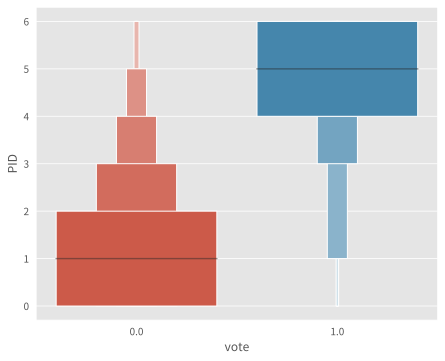

,count,mean,std,min,25%,50%,75%,max
vote,,,,,,,,
0.0,551.0,1.312160,1.464928,0.0,0.0,1.0,2.0,6.0
1.0,393.0,4.987277,1.231948,0.0,4.0,5.0,6.0,6.0


In [4]:
df = df_raw

sns.boxenplot(data=df, x='vote', y='PID')
plt.show()

df = df.groupby('vote')['PID'].describe()
display(df)

In [5]:
df = df_raw
s = df.PID
res = sp.stats.ttest_ind(s[df.vote == 0],
                         s[df.vote == 1],
                         # implies Welch's t-test, works more robust
                         equal_var=False)
print(res,
      f'p-value={res.pvalue}',
      sep='\n\n')

Ttest_indResult(statistic=-41.72880965404561, pvalue=3.953331811564987e-214)

p-value=3.953331811564987e-214


Given the means are the same, the probability to observe the data: <0.01.

In [6]:
# Mann–Whitney U test works better if the variable is ordinal
df = df_raw
s = df.PID
res = sp.stats.mannwhitneyu(s[df.vote == 0],
                            s[df.vote == 1])
print(res,
      f'p-value={res.pvalue}',
      sep='\n\n')

MannwhitneyuResult(statistic=12536.5, pvalue=9.778404312444242e-123)

p-value=9.778404312444242e-123


Given the medians are the same, the probability to observe the data: <0.01.

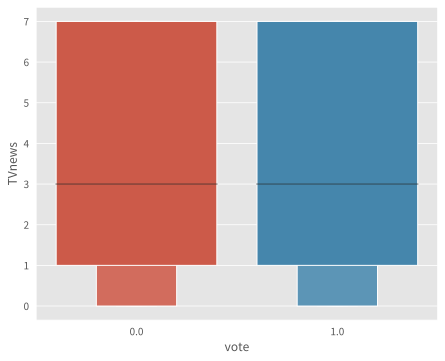

,count,mean,std,min,25%,50%,75%,max
vote,,,,,,,,
0.0,551.0,3.760436,2.668461,0.0,1.0,3.0,7.0,7.0
1.0,393.0,3.681934,2.692223,0.0,1.0,3.0,7.0,7.0


In [7]:
df = df_raw

sns.boxenplot(data=df, x='vote', y='TVnews')
plt.show()

df = df.groupby('vote')['TVnews'].describe()
display(df)

In [8]:
df = df_raw
s = df.TVnews
sp.stats.ttest_ind(s[df.vote == 0],
                   s[df.vote == 1],
                   equal_var=False)
print(res,
      f'p-value={res.pvalue}',
      sep='\n\n')

MannwhitneyuResult(statistic=12536.5, pvalue=9.778404312444242e-123)

p-value=9.778404312444242e-123


In [9]:
df = df_raw
s = df.TVnews
sp.stats.mannwhitneyu(s[df.vote == 0],
                      s[df.vote == 1])
print(res,
      f'p-value={res.pvalue}',
      sep='\n\n')

MannwhitneyuResult(statistic=12536.5, pvalue=9.778404312444242e-123)

p-value=9.778404312444242e-123


educ_geq_college  vote
False             0.0     201
                  1.0     112
True              0.0     350
                  1.0     281
dtype: int64

vote,0.0,1.0
educ_geq_college,,
False,201,112
True,350,281


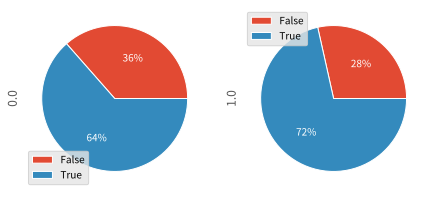

(6.591615839604199, 0.010246013285016538, 1, array([[182.69385593, 130.30614407],
       [368.30614407, 262.69385593]]))

p-value=0.010246013285016538


In [10]:
df = df_raw
df = df.assign(educ_geq_college=(df.educ >= 4))  # 4: some college
s = (df.groupby(['educ_geq_college', 'vote'])
       .size())
display(s)

df = s.unstack()
display(df)

df.plot.pie(subplots=True,
            autopct='%.0f%%',
            textprops=dict(color='w'))
plt.show()

res = sp.stats.chi2_contingency(df,
                                correction=False)

print(res,
      f'p-value={res[1]}',
      sep='\n\n')